# Lab session 1
## Basile Dubois-Bonnaire & 

## Exercice 1 : Gibbs phenomenon

### 1.1

The function $f$ is periodic of period 1. 
We denote by $a_k$ and $b_k$ the $k$-th fourier coefficients.

We quickly find that all the $a_k$ are null, $f$ being odd.
Now calculating the $b_k$ :
$$ 
\begin{align*}
b_k &= 2\bigg(\int\limits_0^{1/2}\sin(2\pi kx)\ dx - \int\limits_{1/2}^1\sin(2\pi kx)\ dx\bigg) \\
b_k &= \frac{2}{\pi k}\big( 1 - \cos(k\pi) \big)
\end{align*}
$$
We find that 
$ b_k = \frac{4}{\pi k}$ if k is odd and null if k is even.

Thus 
$$f(x) = \frac{4}{\pi}\sum\limits_{n=0}^{+\infty}\ \frac{\sin(2(2n+1)\pi x}{2n+1}$$

### 1.2 The code

Enter the number of terms in the sum
100


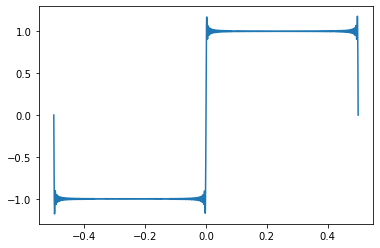

In [19]:
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi


def approx_f(n, Nterms):
    # n is the sampling of x within the last period
    
    f = np.zeros(n*(2*Nterms+1)) 
    X = np.linspace(-0.5,0.5,len(f))
    for n in range(Nterms):
        f += (np.sin(2*(2*n+1)*pi*X)/(2*n+1))
    f *= 4/pi
    
    plt.plot(X,f)
    plt.show()

N = int(input('Enter the number of terms in the sum\n'))
approx_f(10, N)

### 1.3

Suppose we truncate the sum up to the $N$th term. Then the last term will be $\frac{4}{(2N+1)\pi}\sin(2\pi(2N+1)x)$ and has a period of $\frac{1}{2N+1}$.

To accurately depict every function of the sum, x needs to be sampled so that multiple values are taken within its period. Were we to take a regular sampling of $2N+1$ elements then the last function would be represented as a constant and not a sine. This would result in the following error :  

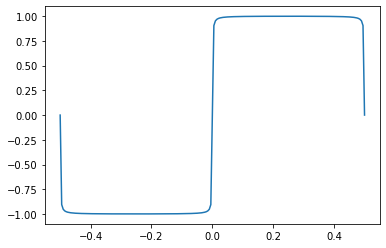

In [20]:
approx_f(1, 100)

A simple way to fix this is thus to take multiple values within the period of the last function. The other functions, having a greater period will benefit from it.

To represent a sine function, a sampling of 5 per period is sufficient though 10 would be even more precise.

We would thus take a sampling of $10(N+1)$ to represent the last function well.

### 1.4 Gibbs phenomenon

Although the function is well represented for most of $]-1/2,0[$ and $]0, 1/2[$ we can see an estimation error on the points of discontinuity of $f$ where the fourier transform noticeably over and under shoots the values of $f$.

This phenomenon does not vanish when increasing Nterms but is "compressed" towards the points of discontinuity.

See the following plots :

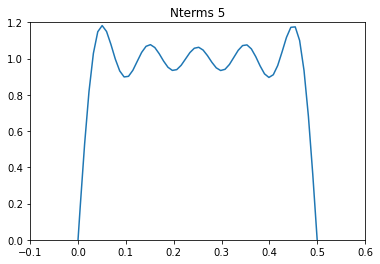

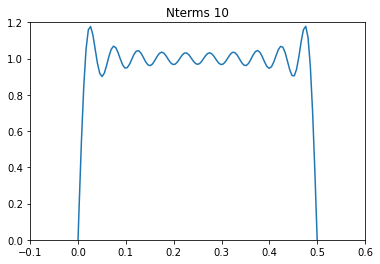

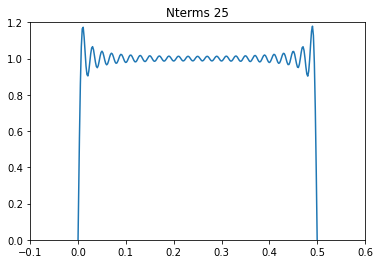

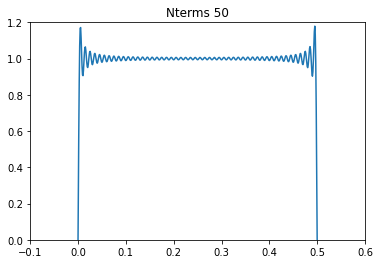

In [21]:
plotted_values = [5,10,25,50]
for i in plotted_values:
    plt.xlim(-0.1,0.6)
    plt.ylim(0,1.2)
    plt.title("Nterms " + str(i))
    approx_f(10, i)

## Exercice 2 : Fast Fourier Transform

### 2.1

The discrete Fourier transform is the calculation of the following sum with $s$ a sequence of $N$ complex numbers :
$$ S(k)= \sum\limits_{n=0}^{N-1} s(n)\exp(-i\frac{2\pi k}{N}n) $$

When approximating $c_k$ the Fourier coefficients of $f$, a periodic function of period T we obtain :
$$
\begin{align*}\\
c_k 	&= \frac{1}{T}\int\limits_0^T f(t)exp(-i\frac{2\pi k}{T}t) dt\\
        &\approx \frac{1}{T}\frac{T}{N}\sum\limits_0^{N-1} f(\frac{nT}{N})exp(-i\frac{2\pi k}{T}\frac{nT}{N}) \\
        &\approx \frac{1}{N}\sum\limits_0^{N-1} f(\frac{nT}{N})exp(-i\frac{2\pi k}{N}n)\\ 
\end{align*}
$$

Which is the discrete Fourier transform of a sequence of N values of $f$ in a period, multiplied by $1/N$.  
We can thus use the fast Fourier transform (FFT) algorithm to approximate the Fourier coefficients of $f$.

In [22]:
def fft_fourier_coef(s):
    return np.fft.fft(s)/len(s)

### 2.2

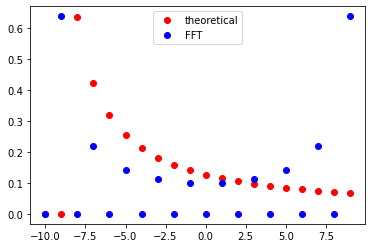

In [23]:
def th_coef(n):
	if n//2 == 0:
		return 0
	else:
		return 4/(np.pi*n)
    
def f(x):
	if x<0:
		return -1
	else:
		return 1
		

nbr_coef = 20
x = np.linspace(-0.5,0.5, nbr_coef)
C_th = np.array([th_coef(i) for i in range(nbr_coef) ])
C_fft = fft_fourier_coef(np.array([f(x[i]) for i in range(nbr_coef)]))

plt.plot(range(-nbr_coef//2,nbr_coef//2), C_th, 'ro', label="theoretical")
plt.plot(range(-nbr_coef//2, nbr_coef//2), np.abs(C_fft),'bo', label="FFT")
plt.legend()

## Exercice 3

We wish to approximate a solution $u$ to the equation 
$$
\begin{equation}
\text{(A)}\ \ \ u(x) -u''(x)=\varphi(x), \forall x\in[0,1]
\end{equation}
$$

### 3.1

$\varphi$ being periodic, we can express it as its Fourier series with $d_k$ its Fourier coefficients
$$ \varphi(t) = \sum\limits_{k=-\infty}^{+\infty} d_k\exp(2\pi kt)$$
Thus truncating to a sum of $N$ elements we find
$$ \varphi(t) \approx \varphi_N(t) = \sum\limits_{k=-N/2+1}^{N/2} d_k\exp(2\pi kt)$$

### 3.2

Remplacing $u$ by $u_N$ and $\varphi$ by $\varphi_N$ in the equation we find 
$$
\sum\limits_{k=-N/2+1}^{N/2} c_k\big(1+\frac{1}{(2\pi k)^2}\big)  \exp(i2\pi kx) = \sum\limits_{k=-N/2+1}^{N/2} d_k \exp(i2\pi kx)
$$
Thus 
$$
\begin{equation}
c_k = \frac{(2\pi k)^2}{1 + (2\pi k)^2} d_k
\end{equation}
$$

### 3.3 

Using the previous exercice we can approximate the Fourier coefficients of $\varphi$ using the given $N$ values. We then calculate the $c_k$ using the previous formula.

In [24]:
def approx_u_coef(phi):
"""
Calculates the approximated coefficients of u.

phi -- a ndarray containing a sample of phi's values
"""
    coef_phi = fft_fourier_coef(phi)
    return np.array([((2*np.pi*i)**2)/((1+(2*np.pi**i))**2)*coef_phi[i] for i in range(len(coef_phi))])

def approx_u(phi,x)
"""
Gives the approximated value of u.

phi -- a ndarray containing a sample of phi's values
"""
coef_u = approx_u_coef(phi)
multiplication = np.array([coef_u[i]*np.exp(2j*np.pi*(i-len)])
    return np.sum(approx_u_coef(phi)*np.exp(2j*np.pi))

### 3.Application

We now consider $\varphi(x)=(1+64\pi^2)\cos(8\pi x)$.
#### Exact solution :

Solving the homogeneous equation $u_0 - u_0'' = 0$ supposing periodicity of 1 gives $u_0=0$. 

$\cos(8\pi x)$ being a particular solution to (A) we have $u(x)=\cos(8\pi x)$ the unique solution to (A).

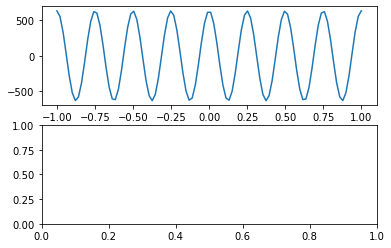

In [28]:
fig, (ax1,ax2) = plt.subplots(2,1)
########## exact solution #############	

u_exact = lambda x : (1+ (8*np.pi)**2*np.cos(8*np.pi*x))

x = np.linspace(-1,1,100)
ax1.plot(x,u_exact(x), label='exact solution')

########## approximate solution ########